<a href="https://colab.research.google.com/github/ajayjai30/IMAGE-CLASSIFICATION-MODEL-USING-KERAS-SEQUENTIAL-METHOD/blob/main/first_ever_model_using_keras_sequential_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the required libraries


*   keras==> models(for importing of models)
*   keras==>layers importing Dense layer and Dropout layer
*   keras==>datasets( for importing datasets)
*   keras==>utils import to_categorical(for performing onehotencoding)
*   keras==>utils.vis_utils import model_to_dot(this is for visualizing the model's performance)
*   Ipython.display(for importing the SVG model)



In [ ]:
! pip install livelossplot

In [ ]:
from keras import models as M
from keras.utils import to_categorical,model_to_dot
from keras.datasets import mnist
from keras.layers import Dense,Dropout
from IPython.display import SVG
import numpy as np
import livelossplot
from keras.callbacks import TensorBoard
#plot_losses=livelossplot.PlotLossKeras()

Initializing the required values

In [ ]:
import livelossplot
plot_losses=livelossplot.PlotLossesKeras()

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

creating an function for the referring the shape of the training and testing size of the datasets including the type of dataset


In [ ]:
def summary_of_data(x_train,y_train,x_test,y_test):
  print("Shape and type of Training images set:",x_train.shape,'\n',x_train.dtype)
  print("Shape and type of Training labels set:",x_test.shape,'\n',x_test.dtype)
  print("Shape and type of Testing images set:",y_train.shape,'\n',y_train.dtype)
  print("shape and type of Testing labels set:",y_test.shape,'\n',y_test.dtype)

In [ ]:
summary_of_data(x_train,y_train,x_test,y_test)

Shape and type of Training images set: (60000, 28, 28) 
 uint8
Shape and type of Training labels set: (10000, 28, 28) 
 uint8
Shape and type of Testing images set: (60000,) 
 uint8
shape and type of Testing labels set: (10000,) 
 uint8


Now reshaping the data as ml algorithms can only operate on 2D data in the training set.

In [ ]:
x_train=x_train.reshape(x_train.shape[0],28*28)

In [ ]:
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

now changing the testing datas into categorical data's as the model needs to categorize the datas as per we need

In [ ]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

now as the testing set of data is in the floating format thereis a needto convert the training data's also into floating data's or testing data's into integers, but changing the training is the best option as the neural models are much precise at floating values

In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

now making an final checking using the summary_of_data function

In [ ]:
summary_of_data(x_train,y_train,x_test,y_test)

Shape and type of Training images set: (60000, 784) 
 float32
Shape and type of Training labels set: (10000, 784) 
 float32
Shape and type of Testing images set: (60000, 10) 
 float32
shape and type of Testing labels set: (10000, 10) 
 float32


now building the model (sequential neural model)

In [ ]:
model=M.Sequential()
model.add(Dense(512,activation='tanh',input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.12))
model.add(Dense(10,activation='softmax'))

after the model building is complete, there is a tune for the model to imporve the accuracy of the model created.

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

now after tuning the model, the training dataset is fitted on the model.

In [ ]:
model.fit(x_train,y_train,batch_size=32,callbacks=[TensorBoard(write_graph=True)],epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 36s 18ms/step - loss: 0.3515 - accuracy: 0.8945 - val_loss: 0.1495 - val_accuracy: 0.9545
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2260 - accuracy: 0.9383 - val_loss: 0.1319 - val_accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2081 - accuracy: 0.9460 - val_loss: 0.1300 - val_accuracy: 0.9642
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1957 - accuracy: 0.9510 - val_loss: 0.1168 - val_accuracy: 0.9697
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1975 - accuracy: 0.9536 - val_loss: 0.1147 - val_accuracy: 0.9697
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1977 - accuracy: 0.9543 - val_loss: 0.1274 - val_accuracy: 0.9712
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1974 - accuracy: 0.9563 - val_loss: 0.1158 -

After the completion of the training, final evaluation is done using the evaluate function

In [ ]:
print("loss occured in the model",model.evaluate(x_test,y_test,verbose=0)[0])
print("Accuracy occured by the model",model.evaluate(x_test,y_test,verbose=0)[1])

loss occured in the model 0.1422877162694931
Accuracy occured by the model 0.9750000238418579


after the training is completed, now looking at a quick summarization on the performance of the model is done.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)               

after looking at the summary, now visualizing the summary in a flowchart format

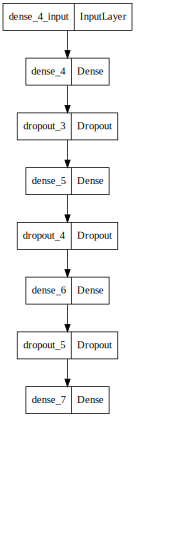

In [ ]:
SVG(model_to_dot(model).create(prog='dot',format='svg'))